<a href="https://colab.research.google.com/github/M-ballabio1/DataScience_ML_DL-projects/blob/main/7.KMeans%20-%20Customer%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KMeans Customer Segmentation**

### Import Libraries and csv file

In [26]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py 
import plotly.graph_objs as go 
from sklearn.cluster import KMeans
import plotly.express as px
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import warnings
import io
plt.style.use('fivethirtyeight')

In [30]:
from google.colab import files 

df = files.upload()

Saving Customers1.csv to Customers1.csv


In [31]:
df = pd.read_csv('Customers1.csv', sep=';')
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
270         271  Female   65                 140                      48
271         272  Female   43                 140                      51
272         273    Male   40                 142                      52
273         274    Male   44                 144                      54
274         275    Male   39                 145                      53

[275 rows x 5 columns]


In [32]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,275.000000,275.000000,275.000000,275.000000
mean,138.000000,40.378182,76.141818,51.494545
std,79.529869,15.561588,34.575184,25.071630
min,1.000000,15.000000,15.000000,1.000000
25%,69.500000,29.000000,48.000000,35.500000
50%,138.000000,37.000000,73.000000,52.000000
75%,206.500000,50.000000,105.000000,70.000000
max,275.000000,80.000000,145.000000,99.000000


### Data Visualization

In [33]:
gender_counts = df.Gender.value_counts()
fig = px.pie(gender_counts, title='Gender Ratio', values='Gender', names=['Male', 'Female'], hole=0.5)
fig.show()

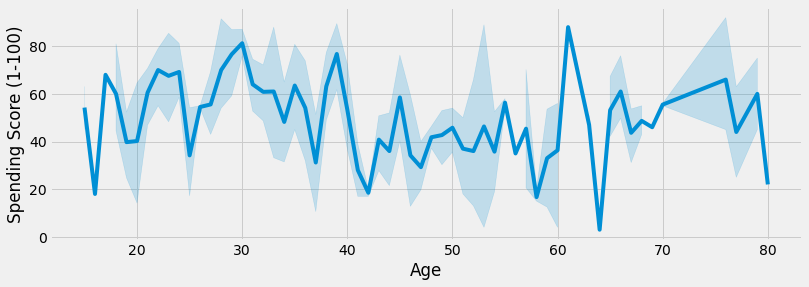

In [34]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='Age', y='Spending Score (1-100)')

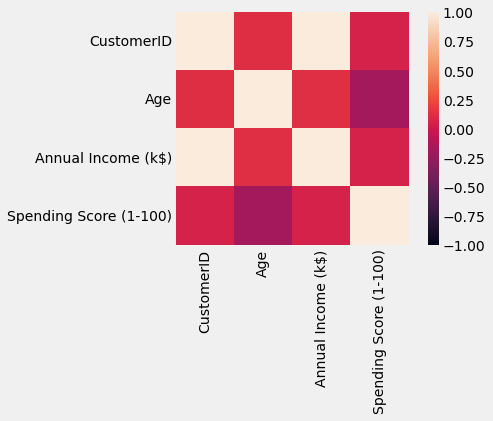

In [35]:
sns.heatmap(df.corr(),square=True, vmax=1, vmin =-1)
plt.show()


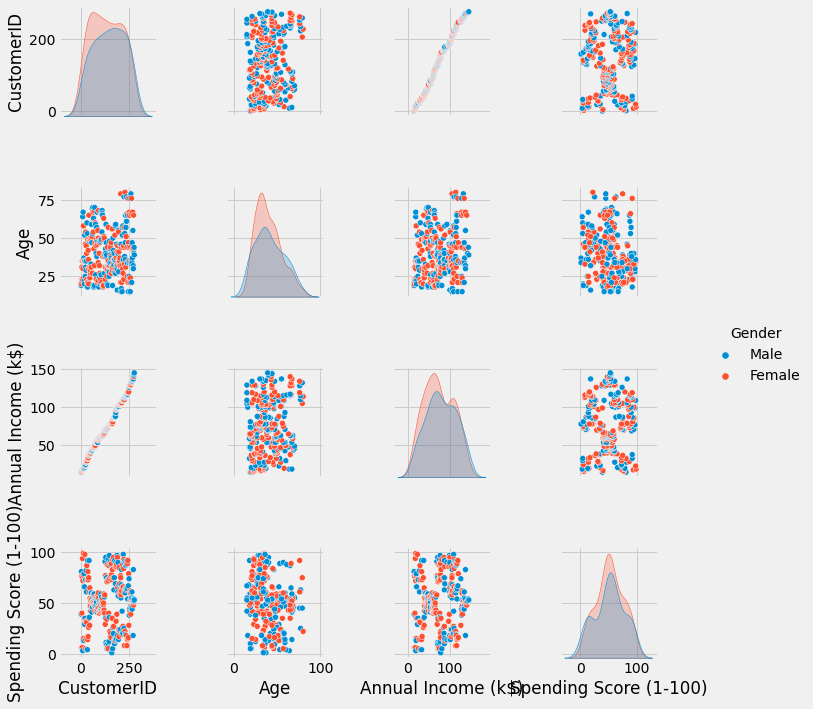

In [36]:
sns.pairplot(df, height = 2.5, hue='Gender')
plt.show()

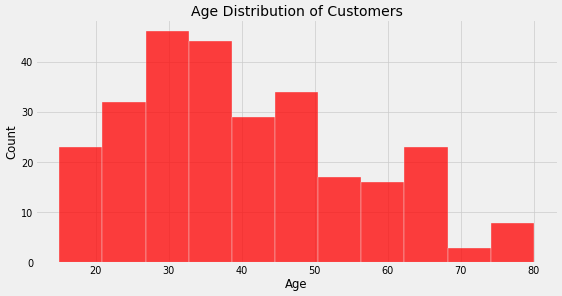

In [37]:
plt.figure(figsize=(12,6),dpi=50)
sns.histplot(data=df,x="Age",color="red")
plt.title("Age Distribution of Customers")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



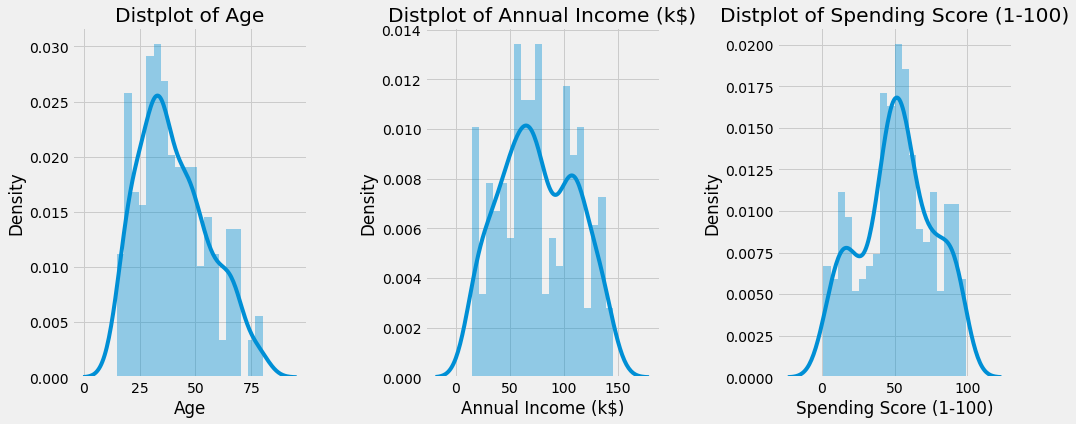

In [38]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### Data Analysis

In [39]:
#SEGMENTATION using Annual Income and Spending Score
XF = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(XF)
    inertia.append(algorithm.inertia_)

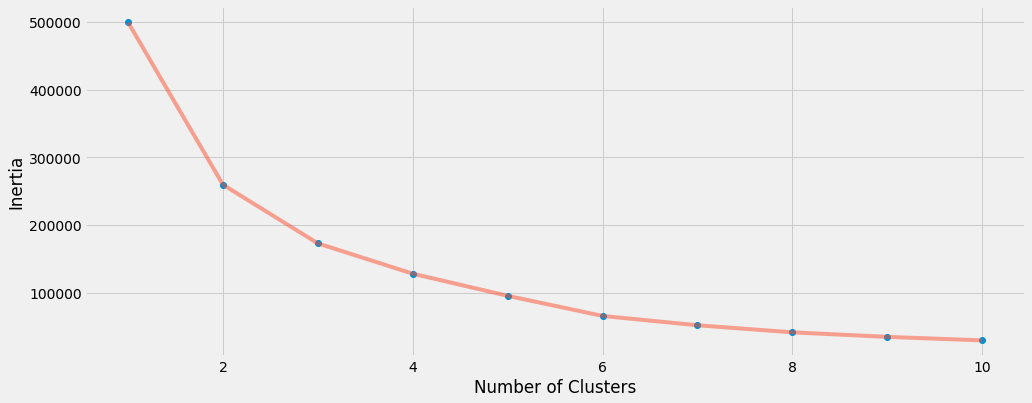

In [40]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [41]:
algorithm = (KMeans(n_clusters = 7 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(XF)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [42]:
h = 0.02
x_min, x_max = XF[:, 0].min() - 1, XF[:, 0].max() + 1
y_min, y_max = XF[:, 1].min() - 1, XF[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

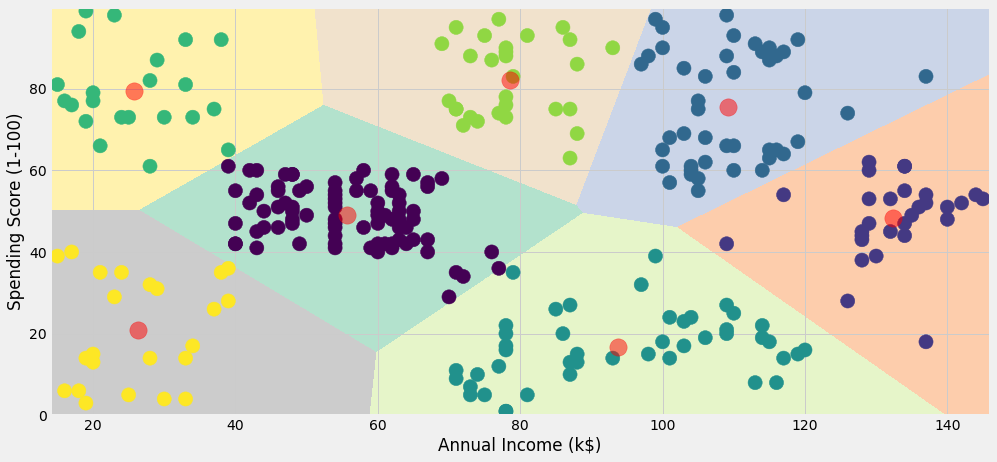

In [43]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

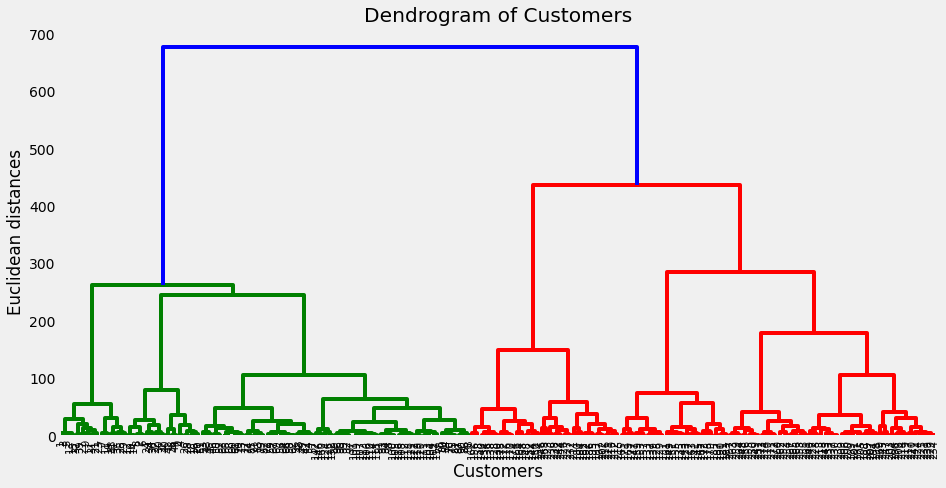

In [44]:
plt.figure(figsize=(14,7))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(XF, method = 'ward'),leaf_font_size=10)
plt.title('Dendrogram of Customers')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.grid(False)
plt.xticks(rotation=90)
plt.show()